# Develop and test an interface to core

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve, core
import warnings
#warnings.filterwarnings('error') # this triggers an exception in the liktlihood mapping

### Load the Geminga data to study resolution from core routines

In [2]:
fn='/nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/geminga_weights.pkl'
bw= main.Main('Geminga', interval=1, mjd_range=None,  weight_file=fn, verbose=1).binned_weights()

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
Binning: 3650 intervals of 1 days from 54683.00 to 58333.00


#### Import code to create a core.CellsLoglikelihood object instantiated weighted bins
then get a DataFrame with the light curve info

In [3]:
import core_interface; reload(core_interface)
coreint = core_interface.CoreInterface(bw)

df=coreint.lightcurve()
df.head()

/nfs/farm/g/glast/u/burnett/analysis/lat_timing/code/core.py:584: RuntimeWarning: invalid value encountered in log
  f0 = np.log(t).sum()-amin*S+dlogl-llmax


Loaded 3597 cells for further analysis
	rejected 53


,time,rate,error
0,51910.633648,0.946244,0.065665
1,51910.633660,1.130462,0.072263
2,51910.633671,1.159046,0.073679
3,51910.633683,1.029611,0.064603
4,51910.633694,0.990317,0.065711


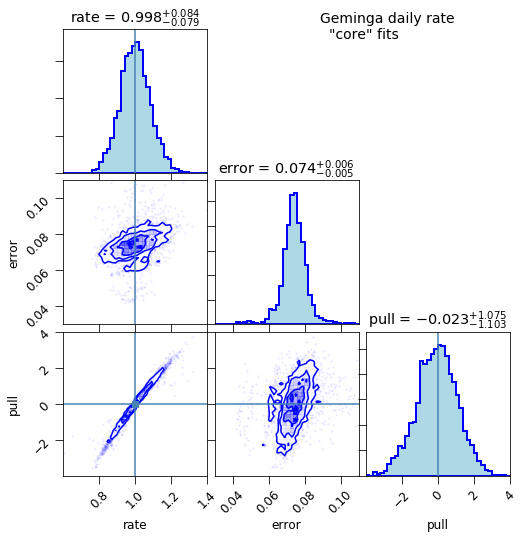

In [4]:
import corner
dfg=df.query('error>0').copy()
dfg.loc[:,'pull']=(dfg.rate.values-1)/dfg.error.values
corner.corner(dfg['rate error pull'.split()],  bins=40, range=[(0.6,1.4), (0.03,0.11),(-4,4)],
              color='blue',show_titles=True, truths=(1.0,None, 0), title_fmt='.3f', 
              hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue'));
plt.gcf().suptitle('Geminga daily rate\n  "core" fits', x=0.6, ha='left', fontsize=14);

#### The light curve itself

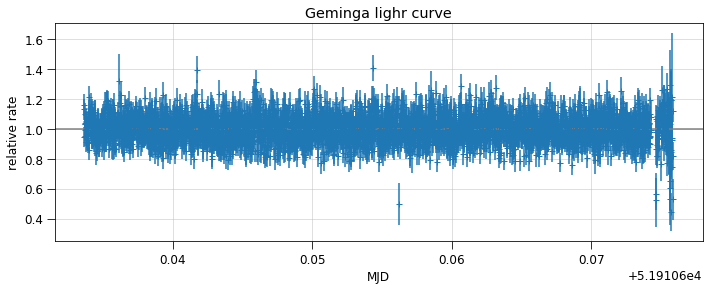

In [5]:
fig, ax = plt.subplots(figsize=(12,4))

ax.errorbar(x=dfg.time, y=dfg.rate, yerr=dfg.error, fmt='+')
ax.axhline(1., color='grey')
ax.set(xlabel='MJD', ylabel='relative rate')
ax.set_title('Geminga lighr curve')
ax.grid(alpha=0.5);